# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** MOHD. YUSRI NASROL
- **Email:** mohdyusrimaulana00@gmail.com
- **ID Dicoding:** MOHD. YUSRI NASROL

## Define Business Questions

- What payment methods do customers use most often?
- What is the average order delivery time and how does it relate to customer location?

## Prepare all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation_dataset_df = pd.read_csv("data/geolocation_dataset.csv")
geolocation_dataset_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_translation_df = pd.read_csv("data/product_category_name_translation.csv")
product_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_df = pd.read_csv("data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- `customers_df`, analysis can be done on customers_df to get the understanding of customer demographics like customer id, customer unique id, customer zip code prefix, customer city, customer state. For example, which city makes more purchases.
- `geolocation_dataset_df`, it will be possible to analyze the location of customers, so as to understand where exactly most customers are coming from. This would assist in a more focused marketing strategy, based on regions.
- `Order items`, The order_items_df, This represents all the data related to the items in each order - the price, shipping cost, and the deadline for delivery. I can now assess price patterns and shipping costs for a variety of products and how this impacts delivery times.
- `order_payments_df`, This is a dataset for storing information on the way of paying, such as type and installment amount. Some insights could be provided in regard to the distribution of kinds of payment types customers use and also how the number of payments relates to the value of transactions.
- `order_reviews_df`, This table contains reviews about the orders by customers. I can go for review_score to gather information about customer satisfaction and look for reviews given by customers for areas to be improved.
- `orders_df`, In this dataset, one finds information about each order, its status, at which time the purchase was made, and when it is estimated for delivery. With it, one can learn more about the development of actual delivery times with estimated ones and purchasing trends in any given period.
- `product_translation_df`, This contains translations of product categories into English, from their native Portuguese. A connection one should have is that of product data with English categories to make it much easier to analyze.
- `products_df`, The product dimensions are stored here, weight of the product, and the product description. One can perform multiple analyses on how the dimensions of a product affect its shipping cost or analyze the distribution of different categories of products.
- `sellers_df`, This dataset has information on sellers, which one could leverage to study the efficiency of the various sellers or the geographical distribution of the location of sellers.



### Assessing Data

#### Assess `customers_df` table

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [15]:
customers_df.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

**Insight:**
- **Uniqueness of Customers**: Although there are 99,441 entries in the dataset, there are only 96,096 `customer_unique_id`. This indicates that some customers may have more than one `customer_id`, which could be an indication that the same customer shopped more than once with different IDs.

- **Diversity of Locations**: This dataset includes 14,994 zip codes (`customer_zip_code_prefix`), 4,119 cities (`customer_city`), and 27 states (`customer_state`). This indicates that customers come from various locations, which can influence purchasing and shipping behavior analysis.

- **Distribution of Zip Codes**: Average `customer_zip_code_prefix` was 35,137, with a fairly wide range from 1,003 to 99,990. This distribution indicates a large variation in customer geographic location, which can be investigated further to see if there are any particular patterns by location.

- **Potential for Customer Segmentation**: With 27 states and 4,119 cities, there is an opportunity to segment customers by location. This can be useful for more targeted marketing and delivery strategies.

- **Analysis of Customer Retention**: Since there are some customers with more than one `customer_id`, further analysis can be performed to understand purchasing patterns and possible customer retention. This can help in strategies to increase customer loyalty.

#### Menilai tabel `geolocation_dataset_df`

In [16]:
geolocation_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [17]:
geolocation_dataset_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [18]:
print("Jumlah duplikasi: ", geolocation_dataset_df.duplicated().sum())

Jumlah duplikasi:  261831


In [19]:
geolocation_dataset_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [20]:
geolocation_dataset_df.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

**Insight:**
- All columns in the dataset have complete values ​​(non-null), which indicates that this data does not have missing values. This facilitates subsequent analysis without the need to deal with missing data.

- There are 261,831 duplicate entries in the dataset. This covers almost 26% of the total data, indicating the need for a cleaning process to remove duplication and ensure the accuracy of the analysis.

- There are 19,015 unique zip codes, 8,011 unique cities, and 27 states, demonstrating the geographic diversity in this dataset. This can be important information for further analysis, such as sales distribution by region.

- The latitude and longitude coordinates show a significant range, with latitude ranging from approximately -36.61 to 45.07 and longitude from -101.47 to 121.10. This indicates that the data covers a fairly large area and may cover geographically disparate regions.

- The average and maximum values ​​of postal codes (`geolocation_zip_code_prefix`) indicate that the dataset includes postal codes from various regions, with a fairly large range between the minimum and maximum values. A negative mean latitude and longitude indicates that the majority of the data is in the Southern Hemisphere (e.g., Brazil).

#### Menilai tabel `order_items_df`

In [21]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [22]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [23]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [24]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [25]:
order_items_df.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

#### Menilai tabel `order_payments_df`

In [26]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [27]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [28]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [29]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [30]:
order_payments_df.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

#### Menilai tabel `order_reviews_df`

In [31]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [32]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [33]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [34]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [35]:
order_reviews_df.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

#### Menilai tabel `orders_df`

In [36]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [37]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [38]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [39]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [40]:
orders_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

#### Menilai tabel `product_translation_df`

In [41]:
product_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [42]:
product_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [43]:
print("Jumlah duplikasi: ", product_translation_df.duplicated().sum())
product_translation_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [44]:
product_translation_df.nunique()

product_category_name            71
product_category_name_english    71
dtype: int64

#### Menilai tabel `products_df`

In [45]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [46]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [47]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [48]:
products_df.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

#### Menilai tabel `sellers_df`

In [49]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [50]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [51]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())


sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [52]:
sellers_df.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

### Cleaning Data

#### Membersihkan tabel `geolocation_dataset_df`

##### Duplicate Data

In [53]:
geolocation_dataset_df.duplicated().sum()

np.int64(261831)

In [54]:
geolocation_dataset_df.drop_duplicates(inplace=True)

In [55]:
print("Jumlah duplikasi: ", geolocation_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


##### Missing Values

In [56]:
geolocation_dataset_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [57]:
geolocation_dataset_df[geolocation_dataset_df.isna()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1000155,NaN,NaN,NaN,NaN,NaN
1000156,NaN,NaN,NaN,NaN,NaN
1000157,NaN,NaN,NaN,NaN,NaN
1000158,NaN,NaN,NaN,NaN,NaN


In [58]:
geolocation_dataset_df.geolocation_zip_code_prefix.value_counts()

geolocation_zip_code_prefix
38400    779
35500    751
11680    727
11740    678
36400    627
        ... 
39110      1
65880      1
65269      1
65233      1
65206      1
Name: count, Length: 19015, dtype: int64

In [59]:
geolocation_dataset_df.fillna(value="38400", inplace=True)

In [60]:
geolocation_dataset_df.geolocation_lat.value_counts()

geolocation_lat
-20.316044    10
-15.797782    10
-22.394112     7
-15.790439     7
-23.542684     6
              ..
-27.886062     1
-27.891644     1
-27.895228     1
-28.099471     1
-23.547762     1
Name: count, Length: 717360, dtype: int64

In [61]:
geolocation_dataset_df.fillna(value="20.316044", inplace=True)

In [62]:
geolocation_dataset_df.geolocation_lng.value_counts()

geolocation_lng
-47.874682    10
-41.322001     9
-48.453749     7
-42.941903     7
-47.880655     7
              ..
-52.223012     1
-52.226857     1
-52.234951     1
-52.147869     1
-51.846871     1
Name: count, Length: 717613, dtype: int64

In [63]:
geolocation_dataset_df.fillna(value="47.874682", inplace=True)

In [64]:
geolocation_dataset_df.geolocation_city.value_counts()

geolocation_city
sao paulo         79927
rio de janeiro    35177
são paulo         19718
belo horizonte    19474
curitiba          11263
                  ...  
tres irmaos           1
cambiasca             1
ipuca                 1
laranjais             1
boa sorte             1
Name: count, Length: 8011, dtype: int64

In [65]:
geolocation_dataset_df.fillna(value="sao paulo", inplace=True)

In [66]:
geolocation_dataset_df.geolocation_state.value_counts()

geolocation_state
SP    285976
MG    101353
RJ     78836
RS     48093
PR     45059
SC     30191
BA     27720
GO     15601
PE     13162
ES     12632
CE      9541
MT      9374
DF      9080
MS      8594
PA      8551
MA      6277
PB      4787
RN      4014
PI      3592
AL      3415
TO      2977
SE      2653
RO      2523
AM      1986
AC      1039
AP       738
RR       568
Name: count, dtype: int64

In [67]:
geolocation_dataset_df.fillna(value="SP", inplace=True)

In [68]:
geolocation_dataset_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

##### Inaccurate value

In [69]:
geolocation_dataset_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,738332.000000,738332.000000,738332.000000
mean,38316.086800,-20.998353,-46.461098
std,30632.496675,5.892315,4.393705
min,1001.000000,-36.605374,-101.466766
25%,12600.000000,-23.603061,-48.867822
50%,29144.000000,-22.873588,-46.647278
75%,65950.000000,-19.923336,-43.836974
max,99990.000000,45.065933,121.105394


In [70]:
geolocation_dataset_df[geolocation_dataset_df.geolocation_zip_code_prefix == geolocation_dataset_df.geolocation_zip_code_prefix.max()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
999758,99990,-28.329718,-51.769615,muliterno,RS
999864,99990,-28.329472,-51.769109,muliterno,RS


In [71]:
geolocation_dataset_df[geolocation_dataset_df.geolocation_lat == geolocation_dataset_df.geolocation_lat.max()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
727755,57319,45.065933,9.341528,pau d'arco,AL


In [72]:
geolocation_dataset_df[geolocation_dataset_df.geolocation_lng == geolocation_dataset_df.geolocation_lng.max()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
965687,95130,14.585073,121.105394,santa lucia do piai,RS


In [73]:
geolocation_dataset_df[geolocation_dataset_df.geolocation_city == geolocation_dataset_df.geolocation_city.max()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
394381,18790,-22.941366,-49.340714,óleo,SP
394951,18790,-22.944293,-49.343426,óleo,SP
395722,18790,-22.937775,-49.337569,óleo,SP
395841,18790,-22.937454,-49.336995,óleo,SP


In [74]:
geolocation_dataset_df[geolocation_dataset_df.geolocation_state == geolocation_dataset_df.geolocation_state.max()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
816086,77064,-10.342336,-48.295596,palmas,TO
816087,77006,-10.171189,-48.325108,palmas,TO
816088,77016,-10.222166,-48.341228,palmas,TO
816089,77020,-10.194660,-48.323723,palmas,TO
816090,77021,-10.210535,-48.325902,palmas,TO
...,...,...,...,...,...
819655,77995,-5.320125,-48.229165,buriti do tocantins,TO
819656,77920,-5.775113,-47.476963,itaguatins,TO
819657,77900,-6.318513,-47.419564,tocantinopolis,TO
819658,77930,-5.612270,-47.760962,axixa do tocantins,TO


In [75]:
geolocation_dataset_df.replace(geolocation_dataset_df.max(), 50, inplace=True)

In [76]:
geolocation_dataset_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,738332.000000,738332.000000,738332.000000
mean,38315.816081,-20.998347,-46.461195
std,30632.393238,5.892392,4.390810
min,50.000000,-36.605374,-101.466766
25%,12600.000000,-23.603061,-48.867822
50%,29144.000000,-22.873588,-46.647278
75%,65950.000000,-19.923336,-43.836974
max,99980.000000,50.000000,50.000000


#### Membersihkan tabel `orders_df`

In [77]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [78]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [79]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column], errors="coerce")

In [80]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [81]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


## Exploratory Data Analysis (EDA)

### Explore `geolocation_dataset_df`

In [82]:
geolocation_dataset_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38315.816081,-20.998347,-46.461195,NaN,NaN
std,30632.393238,5.892392,4.390810,NaN,NaN
min,50.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [83]:
geolocation_dataset_df.groupby("geolocation_zip_code_prefix").agg({
    "geolocation_lat": ["mean", "min", "max"],
    "geolocation_lng": ["mean", "min", "max"],
    "geolocation_city": "count"
})

geolocation_lat                        \
                                       mean        min        max   
geolocation_zip_code_prefix                                         
50                               -28.329595 -28.329718 -28.329472   
1001                             -23.550227 -23.551427 -23.549292   
1002                             -23.547657 -23.548878 -23.544641   
1003                             -23.549000 -23.549083 -23.548901   
1004                             -23.549829 -23.550765 -23.549181   
...                                     ...        ...        ...   
99955                            -28.112176 -28.144740 -28.099471   
99960                            -27.953722 -27.954114 -27.953409   
99965                            -28.183372 -28.210845 -28.173892   
99970                            -28.343920 -28.348616 -28.341329   
99980                            -28.389500 -28.418178 -28.386239   

                            geolocation_lng                        \
                                       mean        min        max   
geolocation_zip_code_prefix                                         
50                               -51.769362 -51.769615 -51.769109   
1001                             -46.634039 -46.634410 -46.633559   
1002                             -46.634991 -46.636361 -46.633180   
1003                             -46.635582 -46.637157 -46.634862   
1004                             -46.634792 -46.635371 -46.634057   
...                                     ...        ...        ...   
99955                            -52.144629 -52.147869 -52.132700   
99960                            -52.025511 -52.031943 -52.016483   
99965                            -52.039850 -52.059927 -52.034367   
99970                            -51.874988 -51.879243 -51.870397   
99980                            -51.843122 -51.850755 -51.779942   

                            geolocation_city  
                                       count  
geolocation_zip_code_prefix                   
50                                         2  
1001                                      11  
1002                                       6  
1003                                      11  
1004                                      14  
...                                      ...  
99955                                     10  
99960                                      5  
99965                                      6  
99970                                     16  
99980                                     21  

[19015 rows x 7 columns]

In [84]:
geolocation_dataset_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [85]:
geolocation_dataset_df.groupby(by="geolocation_city").nunique().sort_values(by="geolocation_zip_code_prefix", ascending=False)
geolocation_dataset_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [86]:
state_unique = geolocation_dataset_df.groupby(by="geolocation_state").nunique().sort_values(by="geolocation_zip_code_prefix", ascending=False)
state_unique.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city
geolocation_state,,,,
SP,6349,273479,273628,1048
MG,1868,100202,100207,1426
RJ,1390,77270,77307,245
RS,1132,47458,47441,691
PR,1046,44372,44395,651


### Explore `orders_df`

In [87]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4279,7a4caa019e7bb13e8a2c00696be65ec5,58359e541013053d51a9831dc013005e,delivered,2018-06-06 22:58:31,2018-06-08 03:14:07,2018-06-08 12:06:00,2018-06-20 22:12:58,2018-07-03
63418,d02b1845a40a0f3f58d0fbf2e04fb0d2,2830de8be97ce6732dfd4c307bc2f353,delivered,2017-11-11 23:02:16,2017-11-11 23:15:29,2017-11-14 20:12:03,2017-11-24 16:12:18,2017-11-27
35509,3d0a2787777e731001936c8a443b22fb,12898a6722d72027d1862c147969adfd,delivered,2017-09-14 10:12:04,2017-09-14 10:25:46,2017-09-14 21:03:50,2017-09-27 17:42:23,2017-10-11
35536,6961987bf1f3af131cc426530c982cc7,fb3fbf7ed79b31b570ac5f62bd029642,delivered,2017-11-19 17:27:57,2017-11-19 17:46:08,2017-11-20 19:18:42,2017-11-27 22:38:35,2017-12-11
13192,61b40f2b303f6b312a3563e508baafb7,4209c2248f1d9e2a244d179a52053ffa,delivered,2018-02-22 08:04:09,2018-02-22 08:40:20,2018-02-23 21:53:02,2018-03-01 02:52:53,2018-03-16


In [88]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [89]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99281,97658,96476,99441,96476.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,12.517548
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,1.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,7.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,16.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,210.000000


<Axes: >

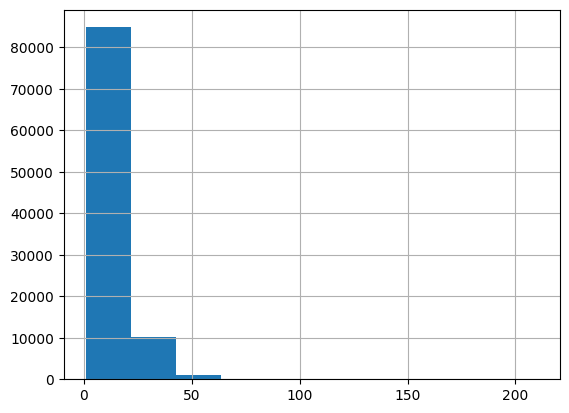

In [90]:
orders_df.delivery_time.hist()

### Explore Data orders_df and customers_df

#### Combine `customers_df` and `orders_df` data

In [91]:
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
71333,bc88c2c13118238d476e8b8b9403ee82,bbe90a456f724404864839cb2b42c369,4674,sao paulo,SP,Active
26527,29e0e64fe43d5a03a37dc252ba6a1682,46636ae16b16848051748f4358d766ac,37558,pouso alegre,MG,Active
37463,90d6f3aabf7ecc12af4416177c85bc11,f6d542c63daee6bf582e288e075a8f32,29172,serra,ES,Active
69458,d06700a6178066421f3bcc4e834926c4,cdb39fc59bcd68bbe98459b8d08880f5,1258,sao paulo,SP,Active
87458,67a37fb3a64e54057411563e843c21e7,8ecc65bf549b6c7ef0ca02f4e115c419,38184,araxa,MG,Active


In [92]:
customers_df.groupby(by="status").customer_id.count()

status
Active    99441
Name: customer_id, dtype: int64

In [93]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


In [94]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False)

customer_city
sao paulo             15540
rio de janeiro         6882
belo horizonte         2773
brasilia               2131
curitiba               1521
                      ...  
ponto novo                1
populina                  1
porteiras                 1
portela                   1
pitanga de estrada        1
Name: order_id, Length: 4119, dtype: int64

In [95]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: order_id, dtype: int64

In [96]:
print(orders_customers_df.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery_time', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'status'],
      dtype='object')


### Explore `order_items_df` and `order_payments_df `

#### Combine data `order_items_df` dan `order_payments_df`

In [97]:
order_items_df.describe(include="all")
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [98]:
order_items_df.sort_values(by="price", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
...,...,...,...,...,...,...,...
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23
87081,c5bdd8ef3c0ec420232e668302179113,2,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30


In [99]:
order_payments_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
52107,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08
34370,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88
41419,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31
49581,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21
85539,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66
...,...,...,...,...,...
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.00
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.00
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.00


In [100]:
order_items_order_payments_df = pd.merge(
    left=order_items_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_items_order_payments_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04


In [101]:
order_items_order_payments_df.groupby(by="payment_type").agg({
    "product_id": "nunique",
    "shipping_limit_date": "sum",
    "price": "sum"
})

,product_id,shipping_limit_date,price
payment_type,,,
boleto,10540,2017-05-23 03:55:272018-02-21 02:55:522018-02-...,2391525.66
credit_card,28428,2017-09-19 09:45:352017-05-03 11:05:132018-01-...,10974357.30
debit_card,1366,2018-07-04 17:11:122018-08-08 15:10:112018-02-...,183758.74
voucher,3143,2017-05-05 10:05:122018-03-27 13:15:272018-03-...,659473.64


In [102]:
order_items_order_payments_df.groupby(by="payment_value").agg({
    "product_id": "nunique",
    "shipping_limit_date": "sum",
    "price": "sum"
}).sort_values(by="payment_value", ascending=False)

,product_id,shipping_limit_date,price
payment_value,,,
13664.08,1,2017-10-06 15:28:202017-10-06 15:28:202017-10-...,13440.00
7274.88,1,2018-07-23 04:31:362018-07-23 04:31:362018-07-...,7160.00
6929.31,1,2017-02-16 20:37:36,6735.00
6922.21,1,2018-08-02 04:05:13,6729.00
6726.66,1,2017-06-15 02:45:17,6499.00
...,...,...,...
0.08,2,2017-12-12 02:29:272017-05-05 20:50:14,91.80
0.05,2,2017-09-19 16:50:082018-06-14 14:18:11,181.80
0.03,2,2018-05-29 12:00:072017-12-05 20:10:00,37.50


### Explore All Data

#### Connects all data

In [103]:
all_df = pd.merge(
    left=orders_customers_df,
    right=order_items_order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,...,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12


In [104]:
all_df.groupby(by=["customer_city", "payment_type"]).agg({
    "payment_value": "sum",
    "price": "sum"
})

payment_value    price
customer_city       payment_type                        
abadia dos dourados boleto                58.28    39.90
                    credit_card          355.22   319.00
abadiania           credit_card         1025.52   949.99
abaete              boleto               492.51   416.97
                    credit_card         1454.30  1315.84
...                                         ...      ...
zacarias            credit_card          229.85   198.80
ze doca             boleto                66.51    39.90
                    credit_card          404.37   289.70
                    voucher              408.04   359.00
zortea              credit_card          137.57    99.80

[7465 rows x 2 columns]

In [105]:
all_df.groupby(by=["customer_state", "payment_type"]).agg({
    "payment_value": "sum",
    "price": "sum"
})

payment_value      price
customer_state payment_type                          
AC             boleto              3908.46    3236.98
               credit_card        19929.65   12400.18
               debit_card           349.62     248.99
               voucher              797.13    1173.29
AL             boleto             16388.24   11318.35
...                                    ...        ...
SP             voucher           160875.06  272854.86
TO             boleto             14409.27   10607.54
               credit_card        55287.11   38479.82
               debit_card           896.65     644.69
               voucher             1688.14    6519.86

[105 rows x 2 columns]

In [106]:
all_df.groupby(by=["payment_installments", "payment_type"]).agg({
    "payment_value": "sum",
    "price": "sum"
})

payment_value       price
payment_installments payment_type                           
0.0                  credit_card          318.57      129.28
1.0                  boleto           4059699.60  2391525.66
                     credit_card      3037235.88  2107865.65
                     debit_card        253533.86   183758.74
                     voucher           405873.03   659473.64
2.0                  credit_card      1846821.16  1342053.05
3.0                  credit_card      1808919.64  1273163.21
4.0                  credit_card      1430001.08  1005395.35
5.0                  credit_card      1191324.71   838244.54
6.0                  credit_card      1083004.22   721787.06
7.0                  credit_card       354243.27   265336.11
8.0                  credit_card      1572881.70  1202462.49
9.0                  credit_card       148223.58   109785.12
10.0                 credit_card      2952124.72  1999470.24
11.0                 credit_card         3113.27     2159.15
12.0                 credit_card        52774.44    36983.94
13.0                 credit_card         2676.19     1984.89
14.0                 credit_card         2664.34     2286.09
15.0                 credit_card        38976.15    30100.83
16.0                 credit_card         2765.57     1298.80
17.0                 credit_card         1221.66     1048.22
18.0                 credit_card        18747.12    12307.87
20.0                 credit_card        11929.53     9543.06
21.0                 credit_card         1337.14      554.80
22.0                 credit_card          228.71      209.99
23.0                 credit_card          236.48      216.00
24.0                 credit_card        27259.09     9971.56

In [107]:
all_df.groupby(by="customer_state").agg({
    "order_id": "sum",
    "price": "sum"
}).sort_values(by="price", ascending=False)

,order_id,price
customer_state,,
SP,e481f51cbdc54678b7cc49136f2d6af7e481f51cbdc546...,5448301.72
RJ,6514b8ad8028c9f2cc2374ded245783fe6ce16cb79ec1d...,1913564.16
MG,82566a660a982b15fb86e904c8d32918ccbabeb0b02433...,1639636.83
RS,136cce7faa42fdb2cefd53fdc79a609876c6e866289321...,787770.53
PR,a4591c265e18cb1dcee52889e2d8acc347aa4816b27ba6...,705856.47
BA,53cdb2fc8bc7dce0b6741e215027345183018ec114eee8...,541411.20
SC,116f0b09343b49556bbad5f35bee0cdf95266dbfb7e203...,538215.45
DF,948097deef559c742e7ce321e5e58919f346ad4ee8f630...,313068.06
GO,47770eb9100c2d0c44946d9cf07ec65ddcb36b511fcac0...,309834.22


In [108]:
all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### What payment methods do customers use most often?

In [109]:
all_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
73025,1f668cb933ff919d9c0f22d752b4503a,322aaaa7739d96945945dd3ea7f0e18f,delivered,2018-04-07 20:11:54,2018-04-10 04:29:32,2018-04-11 14:41:41,2018-04-12 23:38:31,2018-04-25,5.0,808612ec48f7991b74be2feb0315a3f3,...,1.0,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-04-16 04:29:32,69.90,12.43,1.0,boleto,1.0,82.33
68733,27dc874d0fc1a19c74ec77ca706be968,f70caac357fd937a7c229b019eec9110,delivered,2018-07-02 07:52:38,2018-07-02 08:10:11,2018-07-03 12:53:00,2018-07-04 22:03:25,2018-07-18,3.0,d014f51b7dd542baedb3b0699a2a53ba,...,1.0,24c03f6980d5f778bcf41785abe25533,d91fb3b7d041e83b64a00a3edfb37e4f,2018-07-06 08:10:11,36.20,11.98,1.0,credit_card,1.0,48.18
29433,1ecbc003862e0ec743279fdddb78fa0f,2a2c0a13dbcdeecb4ee2242d223aa86f,delivered,2018-03-12 15:49:12,2018-03-12 16:13:01,2018-03-14 01:35:17,2018-03-21 19:20:59,2018-04-09,9.0,28e00be3c472f5b268813f82b1cf423e,...,1.0,dbb67791e405873b259e4656bf971246,9c0e69c7bf2619675bbadf47b43f655a,2018-03-19 16:13:01,81.99,7.92,1.0,credit_card,6.0,89.91
110106,50ec02cdd09a0a80fbb65a1505eed464,4d56e224cc6d838eef5727af0298d4a1,delivered,2018-03-01 13:04:09,2018-03-01 13:15:29,2018-03-02 00:16:56,2018-03-06 16:33:27,2018-03-15,5.0,f243eed691a2628733a8f9d2ddd1d4bb,...,1.0,eb2d12bc991561d4ca5deff0e60854e4,a416b6a846a11724393025641d4edd5e,2018-03-09 13:15:29,128.90,9.72,1.0,credit_card,6.0,138.62
106835,de45fff90798d4416b9ba1b7aa4ccd7b,e9a4def88f3b9bef3792b8eb0c665722,delivered,2018-07-02 21:01:02,2018-07-02 21:10:53,2018-07-03 12:11:00,2018-07-26 00:02:28,2018-08-01,23.0,9c2af4e0b12e6c662ce5e1580c0a8408,...,1.0,700e755cb2df115278726cbf8cc322fd,54c04bdb5ec46762f8f08c7e8f86ed4a,2018-07-08 21:10:53,270.00,45.82,1.0,credit_card,5.0,315.82


In [110]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0


In [111]:
if 'order_date' not in all_df.columns:
    all_df['order_date'] = pd.to_datetime(all_df['order_purchase_timestamp'])
monthly_orders_df = all_df.resample(rule='ME', on='order_date').agg({
    "order_id": "nunique",
    "price": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

monthly_orders_df.head()


,order_date,order_count,revenue
0,2016-09,4,267.36
1,2016-10,324,50942.23
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,800,128637.99


In [112]:
all_df.groupby(by=["payment_installments", "payment_type"]).agg({
    "payment_value": "sum",
    "price": "sum"
})

payment_value       price
payment_installments payment_type                           
0.0                  credit_card          318.57      129.28
1.0                  boleto           4059699.60  2391525.66
                     credit_card      3037235.88  2107865.65
                     debit_card        253533.86   183758.74
                     voucher           405873.03   659473.64
2.0                  credit_card      1846821.16  1342053.05
3.0                  credit_card      1808919.64  1273163.21
4.0                  credit_card      1430001.08  1005395.35
5.0                  credit_card      1191324.71   838244.54
6.0                  credit_card      1083004.22   721787.06
7.0                  credit_card       354243.27   265336.11
8.0                  credit_card      1572881.70  1202462.49
9.0                  credit_card       148223.58   109785.12
10.0                 credit_card      2952124.72  1999470.24
11.0                 credit_card         3113.27     2159.15
12.0                 credit_card        52774.44    36983.94
13.0                 credit_card         2676.19     1984.89
14.0                 credit_card         2664.34     2286.09
15.0                 credit_card        38976.15    30100.83
16.0                 credit_card         2765.57     1298.80
17.0                 credit_card         1221.66     1048.22
18.0                 credit_card        18747.12    12307.87
20.0                 credit_card        11929.53     9543.06
21.0                 credit_card         1337.14      554.80
22.0                 credit_card          228.71      209.99
23.0                 credit_card          236.48      216.00
24.0                 credit_card        27259.09     9971.56

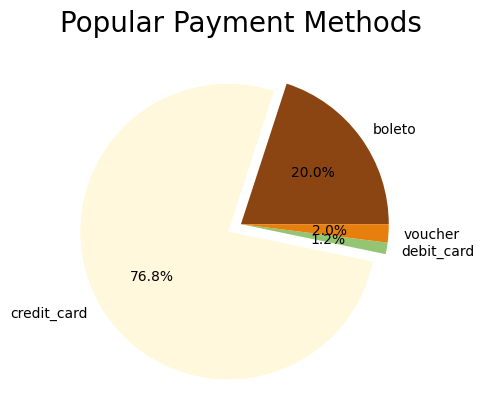

In [113]:
all_df = pd.read_csv('all_data.csv')
total_payment_value = all_df.groupby('payment_type')['payment_value'].sum()
payment_types = total_payment_value.index
payment_values = total_payment_value.values

colors = ['#8B4513', '#FFF8DC', '#93C572', '#E67F0D']
explode = [0.1 if payment_type == 'credit_card' else 0 for payment_type in payment_types]

plt.pie(
    x=payment_values,
    labels=payment_types,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)
plt.title("Popular Payment Methods", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


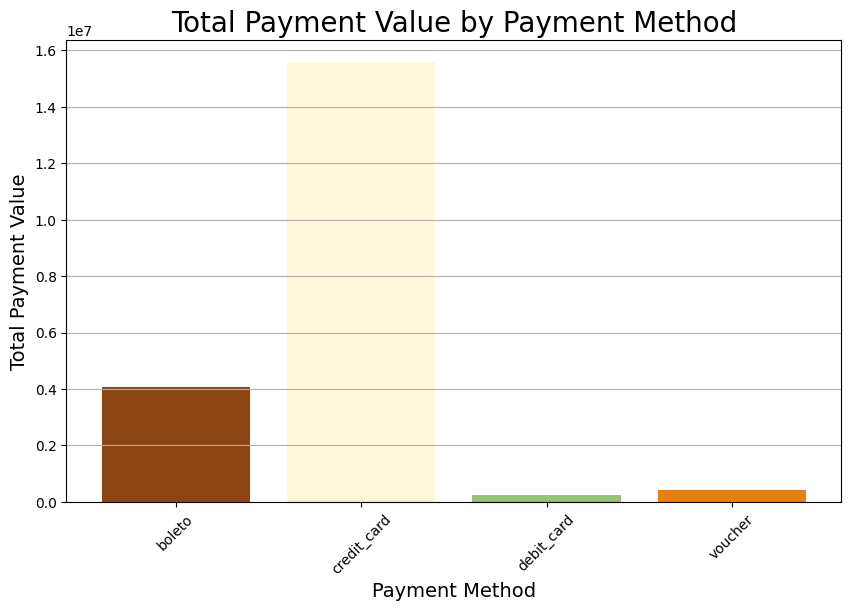

In [114]:
all_df = pd.read_csv('all_data.csv')
total_payment_value = all_df.groupby('payment_type')['payment_value'].sum()
payment_types = total_payment_value.index
payment_values = total_payment_value.values

plt.figure(figsize=(10, 6))
plt.bar(payment_types, payment_values, color=['#8B4513', '#FFF8DC', '#93C572', '#E67F0D'])
plt.title("Total Payment Value by Payment Method", fontsize=20)
plt.xlabel("Payment Method", fontsize=14)
plt.ylabel("Total Payment Value", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

**Insight:**
- The most popular payment method is credit card, as it accounts for the highest percentage of the total payment value.
- Boleto is also a widely used payment method, contributing significantly to the total payment value.
- Debit card and voucher are used less frequently compared to credit cards and boleto but still have notable contributions to the overall payment values.
- The preference for payment methods shows a clear inclination towards credit cards, highlighting the importance of providing seamless credit card payment options to enhance customer satisfaction and increase sales.







### What is the average order delivery time and how does it relate to customer location?

In [115]:
all_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
6680,a028a53499d56225d417f0561ea2c1a8,a4d021990afaaa8e7c8c41f9fe72d7ed,delivered,2018-01-19 16:33:57,2018-01-19 16:59:44,2018-01-23 12:13:57,2018-02-02 13:09:37,2018-02-14,14.0,175fb6b5133abe30730dd6108d122b80,...,1.0,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-01-26 16:59:44,69.90,16.12,1.0,credit_card,2.0,172.04
60225,c1a2ee16a0ebb378f57bdf69fcf45b79,01a61e75bd333a349351fba370520597,delivered,2018-08-19 18:44:47,2018-08-20 13:20:24,2018-08-28 17:10:00,2018-08-29 14:49:06,2018-08-28,10.0,51498d611c600d2fbc05374a3928cfb2,...,1.0,7814c273ab16783d73a9863ebfa8b141,1025f0e2d44d7041d6cf58b6550e0bfa,2018-08-27 12:50:35,230.00,26.59,1.0,credit_card,1.0,256.59
88684,43f32db0dedd975e294e98ce23b24661,1217bf0350d846210fecc72bfa663ce1,delivered,2018-05-11 17:08:52,2018-05-15 04:12:22,2018-05-16 13:24:00,2018-05-21 22:47:46,2018-05-28,10.0,b25c74b16e09b4a3390a6db984004c44,...,2.0,1f411e9a31196b71ed8438c8254b858e,7681ef142fd2c19048da7430856b5588,2018-05-18 04:12:22,619.99,25.89,1.0,boleto,1.0,1937.64
85933,695c5f386b78f79a4c1606cb71ae311c,e32ca66e09cc9793f1e4cfc5310ad8d1,delivered,2017-10-09 11:49:44,2017-10-10 03:49:22,2017-10-20 21:08:46,2017-10-24 19:22:46,2017-10-26,15.0,afb4dda79bc861c1094cfcb56b7813f3,...,1.0,9ae64e1163bf254bad20d5155cffb99d,3d871de0142ce09b7081e2b9d1733cb1,2017-10-17 04:49:22,79.00,45.02,1.0,boleto,1.0,124.02
109223,46b5ee58f02c3f33a7bf816bfc5da13c,818152a30285089f1b46dc548a601c71,delivered,2018-02-27 08:23:31,2018-02-27 08:35:27,2018-03-01 00:52:13,2018-03-10 00:27:44,2018-03-19,11.0,32d91a2beeaac4b5d31353cc60f2aea3,...,1.0,67cf741b2e7fa5801046eeb8b95b8aa8,ea8482cd71df3c1969d7b9473ff13abc,2018-03-05 08:35:27,24.99,11.85,1.0,credit_card,1.0,36.84


In [116]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])
all_df['order_delivered_customer_date'] = pd.to_datetime(all_df['order_delivered_customer_date'])
all_df['delivery_time_days'] = (all_df['order_delivered_customer_date'] - all_df['order_purchase_timestamp']).dt.days

print(all_df[['order_purchase_timestamp', 'order_delivered_customer_date', 'delivery_time_days']].head())

  order_purchase_timestamp order_delivered_customer_date  delivery_time_days
0      2017-10-02 10:56:33           2017-10-10 21:25:13                 8.0
1      2017-10-02 10:56:33           2017-10-10 21:25:13                 8.0
2      2017-10-02 10:56:33           2017-10-10 21:25:13                 8.0
3      2018-07-24 20:41:37           2018-08-07 15:27:45                13.0
4      2018-08-08 08:38:49           2018-08-17 18:06:29                 9.0


In [117]:
delivery_location_df = all_df[['customer_state', 'delivery_time_days']]
print(delivery_location_df.head())

  customer_state  delivery_time_days
0             SP                 8.0
1             SP                 8.0
2             SP                 8.0
3             BA                13.0
4             GO                 9.0


In [118]:
average_delivery_time_by_location = delivery_location_df.groupby('customer_state')['delivery_time_days'].mean().reset_index()
print(average_delivery_time_by_location)

   customer_state  delivery_time_days
0              AC           20.170213
1              AL           24.138322
2              AM           26.100592
3              AP           27.662651
4              BA           18.721628
5              CE           20.354903
6              DF           12.468815
7              ES           15.226268
8              GO           14.928752
9              MA           21.255501
10             MG           11.497541
11             MS           15.051497
12             MT           17.526413
13             PA           23.255963
14             PB           20.126806
15             PE           17.794311
16             PI           18.896926
17             PR           11.516530
18             RJ           14.763646
19             RN           19.197861
20             RO           19.234875
21             RR           27.826087
22             RS           14.693200
23             SC           14.498461
24             SE           20.886010
25          

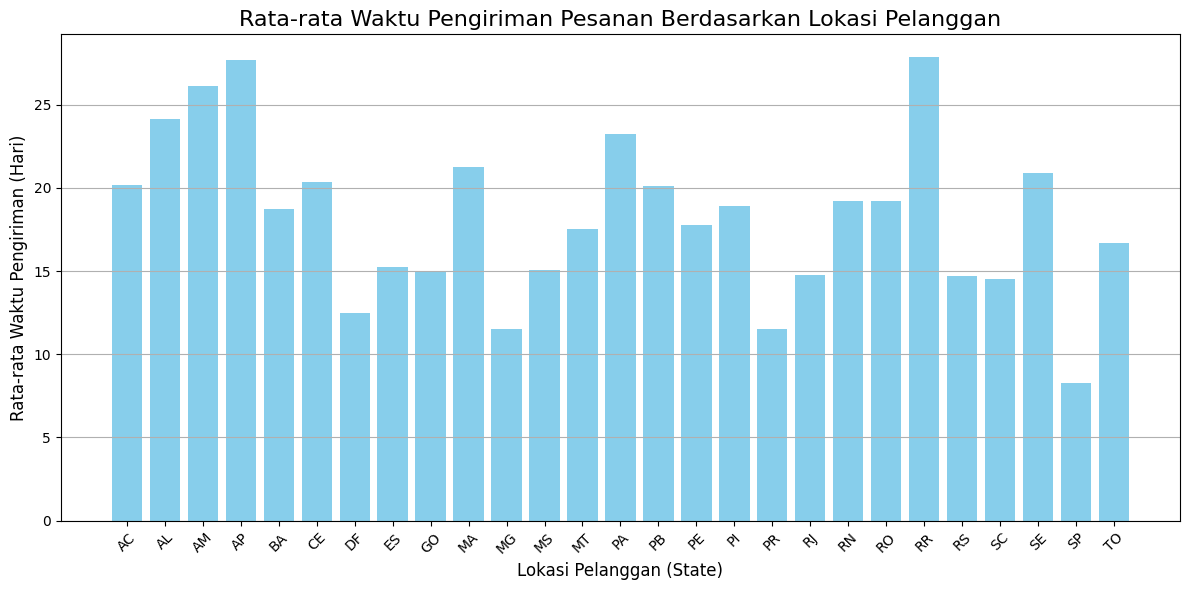

In [119]:
plt.figure(figsize=(12, 6))
plt.bar(average_delivery_time_by_location['customer_state'],
        average_delivery_time_by_location['delivery_time_days'],
        color='skyblue')

plt.title('Rata-rata Waktu Pengiriman Pesanan Berdasarkan Lokasi Pelanggan', fontsize=16)
plt.xlabel('Lokasi Pelanggan (State)', fontsize=12)
plt.ylabel('Rata-rata Waktu Pengiriman (Hari)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

**Insight:**
- There is significant variation in average delivery times based on customer location. Some states such as SP (São Paulo) have shorter average delivery times (around 8 days), while other locations such as RR (Roraima) show longer delivery times (around 27 days).
- Locations with better logistics infrastructure tend to have faster delivery times, suggesting that geographic and accessibility factors influence the efficiency of shipping goods.

### Conclusion

- Customer Demographics, analysis of the customer dataset (customers_df) provides insights into customer demographics, such as the city and state of residence. This helps identify the cities with the highest number of purchases, which can be used to formulate more focused marketing strategies.
- Customer Location, geolocation dataset (geolocation_dataset_df) enables analysis of customer location. Understanding the geographical origin of customers can improve marketing strategies and strengthen campaigns in high-potential areas.
- Order Item Polarization, from the order items dataset (order_items_df), analysis of pricing and shipping cost patterns for different products can be done. This is also useful for evaluating the impact of delivery time on customer satisfaction.
- Payment Preferences, the payments dataset (order_payments_df) provides insight into the most commonly used payment methods. This analysis can help understand payment trends and the relationship between payment type and transaction value.
- Customer Reviews, analysis of customer reviews (order_reviews_df) shows the level of customer satisfaction through review_score. Identifying areas for improvement can help improve service and product quality.
- Order Trends and Shipping Status, from the orders dataset (orders_df), we can understand the actual delivery time development as compared to the estimated one. It also helps in identifying purchasing trends over a period of time.
- Product Categorization, the product category translation dataset (product_translation_df) allows for easier analysis of English product categories. This facilitates data integration with other product categories.
- Product Dimension Analysis, through the products dataset (products_df), analysis can be done to understand how product dimensions and weights affect shipping costs and distribution of the product category.
- Seller Efficiency, the sellers dataset (sellers_df) provides information on the efficiency and geographical distribution of sellers. This analysis can help in evaluating seller performance and formulating strategies to improve collaboration with high performing sellers.

Question 1 - What payment methods do customers use most often?
- My conclusion from data analysis regarding the payment methods most frequently used by customers from the analysis, it can be seen that the most popular payment method is credit cards, which account for around 76.8% of the total payment value. This method shows strong dominance among customers, indicating a high preference for using credit cards for transactions. Boleto is also a significant payment method, contributing 20.0% of the total payment value. This shows that even though credit cards are more widely used, boleto remains a relevant choice for customers. Meanwhile, the use of debit cards and vouchers is much lower, contributing only 1.2% and 2.0% of the total payment value, respectively. Although their contributions are smaller, these methods are still important and show that some customers have different preferences in making payments.

Question 2 - What is the average order delivery time and how does it relate to customer location?
- My conclusion that I got from the data analysis on order delivery time and its relationship with customer location is in this analysis, I calculated the average order delivery time based on customer location. The results show that there is a significant variation in the average delivery time in each state. For example, the state of SP (São Paulo) has a faster delivery time, which is around 8 days, while the state of RR (Roraima) experiences a longer delivery time, which is around 27 days. This indicates that geographical factors and logistics infrastructure play an important role in the efficiency of goods delivery. Locations with better accessibility tend to have shorter delivery times, while areas that are difficult to reach or have poor infrastructure can experience longer delays. In conclusion, to improve customer satisfaction, companies must consider location factors in their logistics and delivery strategies.